In [10]:
%pip install matplotlib seaborn shap


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.60.0-cp312-cp312-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.43.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached numba-0.60.0-cp312-cp312-win_amd64.whl (2.7 MB)
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.6 MB 508.0 kB/s eta 0:00:30
   - -------------------------------------- 0.5/15.6 MB 508.0 kB/s eta 0:00:30
   -- ------------------------------------- 0.8/15.6 MB 578.7 kB/s eta 0:00:26
   -- ---------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
%pip install numpy==2.0.0


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 932.9 kB/s eta 0:00:17
   - -------------------------------------- 0.5/16.2 MB 932.9 kB/s eta 0:00:17
   - -------------------------------------- 0.8/16.2 MB 780.2 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/16.2 MB 931.8 kB/s eta 0:00:17
   --- ------------------------------------ 1.3/16.2 MB 907.1 kB/s eta 0:00:17
   --- ------------------------------------ 1.6/16.2 MB 999.0 kB/s eta 0:00:15
   ---- ----------------------------------- 1.8/16.2 MB 1.1 MB/s eta 0:00:14
   ----- ---------------------------------- 2.4/16.2 MB 1.1 MB/s eta 0:00:13
   ------ --------------------------------- 2.6/16.2 MB 1.2 MB/s eta 0:00:12
   ------- ---

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip freeze > requirements.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import plot_tree
import shap
from joblib import load

c:\Users\princ\Documents\languages\py\endsem-project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
class RandomForestExplainer:
    def __init__(self, grid_search_model, feature_names):
        """
        Initialize the explainer with a GridSearchCV model
        
        :param grid_search_model: Trained GridSearchCV model
        :param feature_names: List of input feature names
        """
        self.model = grid_search_model.best_estimator_
        self.feature_names = feature_names
        
        # Initialize SHAP explainer using best model
        self.explainer = shap.TreeExplainer(self.model)
    
    def feature_importance(self):
        """
        Generate feature importance plot using best model
        """
        importances = self.model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances in Fire Prediction")
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [self.feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        return plt
    
    def decision_tree_visualization(self, tree_index=0):
        """
        Visualize a single decision tree from the best model's forest
        
        :param tree_index: Index of the tree to visualize
        :return: Matplotlib figure with decision tree
        """
        plt.figure(figsize=(40,20))
        plot_tree(self.model.estimators_[tree_index], 
                  feature_names=self.feature_names,
                  class_names=['No Fire', 'Fire'],
                  filled=True, 
                  rounded=True,
                  fontsize=10)
        plt.title(f"Decision Tree {tree_index} in Random Forest")
        return plt

Explainability script ready. Important notes:
1. Replace placeholder model training with your actual model
2. Use real training data for SHAP and Partial Dependence plots
3. Ensure you have required libraries: sklearn, shap, matplotlib, seaborn


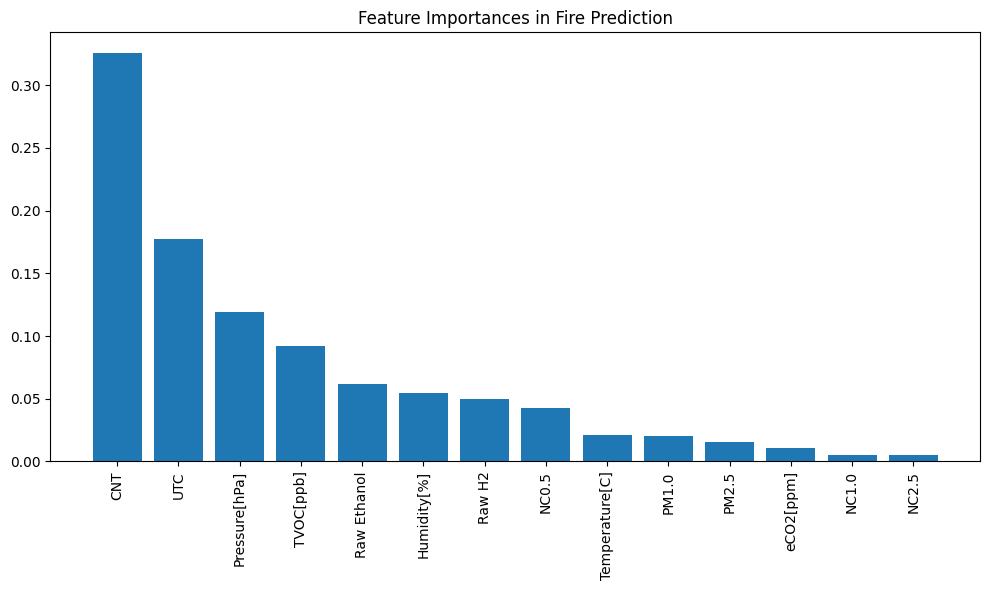

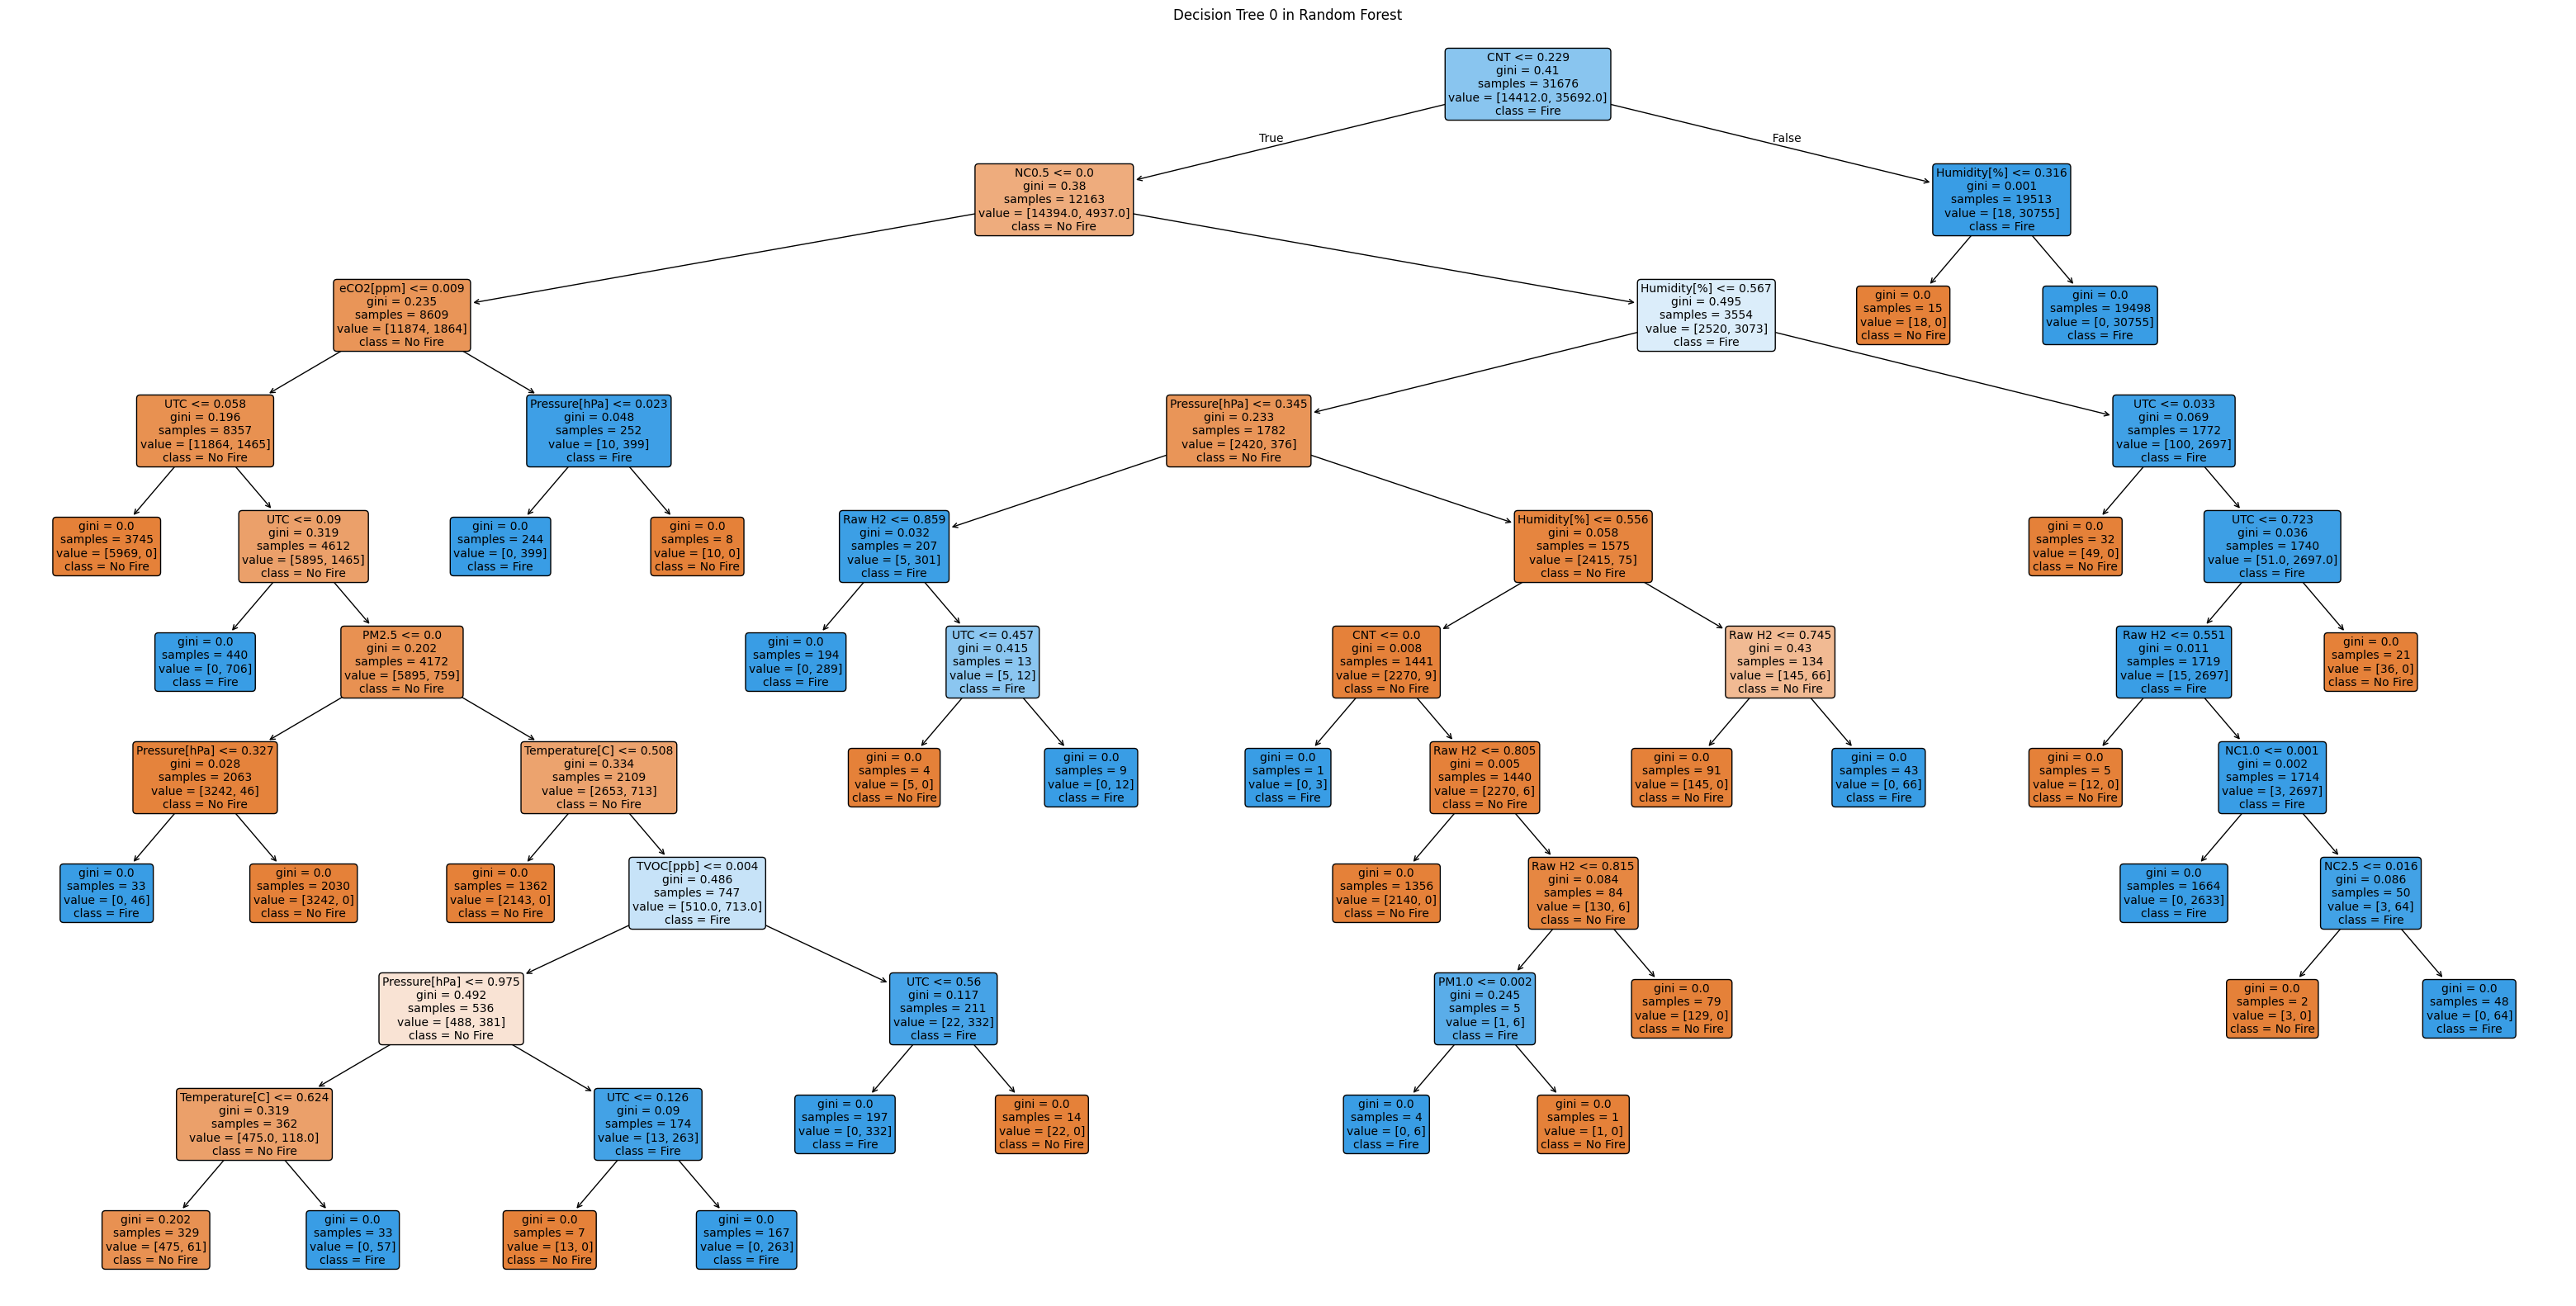

In [14]:
def load_example_input():
    """
    Load the example input data
    
    :return: Pandas DataFrame with input features
    """
    return pd.DataFrame({
        "UTC": [1654764521],
        "Temperature[C]": [19.16],
        "Humidity[%]": [56.86],
        "TVOC[ppb]": [11],
        "eCO2[ppm]": [400],
        "Raw H2": [13347],
        "Raw Ethanol": [20160],
        "Pressure[hPa]": [939.575],
        "PM1.0": [1.78],
        "PM2.5": [1.85],
        "NC0.5": [12.25],
        "NC1.0": [1.911],
        "NC2.5": [0.043],
        "CNT": [3178]
    })


# Load example data
data = load_example_input()
feature_names = data.columns.tolist()

# Train model
model = load('C:\\Users\\princ\\Documents\\languages\\py\\endsem-project\\training\\out\\random_forest_model.joblib')

# Create explainer
explainer = RandomForestExplainer(model, feature_names)

# Generate and save visualizations
explainer.feature_importance().savefig('feature_importance.png')
explainer.decision_tree_visualization().savefig('decision_tree.png')

# Note: SHAP and Partial Dependence require actual training data
# These are placeholders and would need real data
# explainer.shap_summary_plot(data).savefig('shap_summary.png')
# explainer.partial_dependence_plots(data).savefig('partial_dependence.png')

print("Explainability script ready. Important notes:")
print("1. Replace placeholder model training with your actual model")
print("2. Use real training data for SHAP and Partial Dependence plots")
print("3. Ensure you have required libraries: sklearn, shap, matplotlib, seaborn")